<h1><b> PROCESAMIENTO DE SEÑALES UNIDIMENSIONALES CON MODELOS AUTO
REGRESIVOS, CONVOLUCIÓN 1D, CONVOLUCIÓN 2D USANDO EL
ESPECTROGRAMA Y REDES RECURRENTES </b>
</h1>

<hr>

<h3> Presentado por </h3>

<li> Juan Sebastian Cortez </li>
<li> Roberto Carlos Mosquera </li>
<li> Esteban Ramos Gomez </li>

<hr>

<b> ENUNCIADO DEL EJERCICIO</b>
<br>
<br>
En este entregable se realizarán una serie de modelos basados en Deep Learning para
procesamiento de señales secuenciales como las provenientes de series de tiempo, de
sensores inerciales de movimiento y de audio.
Para su realización, se formaran equipos de 3 personas, por lo que se espera un alto nivel
de realización y detalle.

<h1> Objetivos de la aplicacion <h1/>

<h1> Objetivo General<h1/>
<h3>Diseñar, entrenar y optimizar modelos basados en redes neuronales profundas (DNN, CNN 1D y RNN) para la predicción de precios futuros en una serie temporal de datos del oro, utilizando el dataset "Price Gold" de Kaggle, evaluando su rendimiento mediante métricas específicas como MAE y RMSE para identificar la arquitectura más eficiente.<h3/>

<h3>- Desarrollar modelos predictivos para la serie temporal de precios del oro, utilizando datos del dataset "Price Gold" de Kaggle.<h3/>
<h3>- Implementar y comparar tres modelos de redes neuronales profundas (DNN, CNN 1D y RNN) para predecir precios futuros en uno y varios pasos.<h3/>
<h3>- Optimizar cada modelo para obtener el mejor desempeño posible utilizando métricas específicas para series temporales, como MAE y RMSE.<h3/>

<h1>Descripcion del proyecto<h1/>

<h3>El proyecto se centra en la predicción de precios del oro utilizando la serie temporal del dataset "Price Gold" de Kaggle. El enfoque principal es implementar tres modelos basados en redes neuronales profundas: una red multicapa (DNN), una red convolucional 1D (CNN 1D) y una red recurrente (RNN), todas entrenadas en TensorFlow-Keras. Estos modelos se entrenarán para realizar predicciones de uno y varios pasos en el futuro, evaluando su precisión y capacidad de generalización. El proyecto incluye un análisis comparativo detallado de las arquitecturas para identificar la más adecuada para este problema.<h3/>

In [ ]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import missingno as msno
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_error,  r2_score, mean_absolute_percentage_error
from keras import callbacks as call
from keras import models as mod
import keras
import os
tf.random.set_seed(42)
from sklearn.metrics import root_mean_squared_error, mean_absolute_error,  r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

<h3> <b> 1. PRIMER PUNTO DE LA TAREA </b></h3>

Seleccione una serie temporal de algún repositorio de datos y realice la predicción
de uno y varios pasos usando un modelo auto-regresivo.








<li> <b> 1.1. </b> Analisis exploratorio de datos

Se descargar el datasert Price Gold de Kaggle, se realiza de esta manera para que cualquier persona que tenga accedo a internet y a este codigo, pueda descargar el dataset y usarlo

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/learn-time-series-forecasting-from-gold-price")

print("Path to dataset files:", path)

100%|██████████| 48.6k/48.6k [00:00<00:00, 26.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/learn-time-series-forecasting-from-gold-price/versions/1


In [ ]:
import os

# Listar archivos en la ruta del dataset
files = os.listdir(path)
print("Archivos disponibles en el dataset:")
for file in files:
    print(file)


Archivos disponibles en el dataset:
gold_price_data.csv


In [ ]:
# Ruta completa al archivo CSV
csv_file = os.path.join(path, "gold_price_data.csv")

# Cargar el archivo CSV en un DataFrame
datosT = pd.read_csv(csv_file)

# Mostrar las primeras filas del dataset
print(datosT.head())

         Date  Value
0  1970-01-01   35.2
1  1970-04-01   35.1
2  1970-07-01   35.4
3  1970-10-01   36.2
4  1971-01-01   37.4


Miramos las primeras 5 filas que estan contenidas en el dataset

In [ ]:
import pandas as pd
import os

# Ruta completa al archivo CSV
csv_file = os.path.join(path, "gold_price_data.csv")

# Cargar el archivo CSV en un DataFrame
datosT = pd.read_csv(csv_file)

# Convertimos la columna 'Date' a formato datetime
datosT['Date'] = pd.to_datetime(datosT['Date'], format='%Y-%m-%d')

# Establecemos la columna 'Date' como índice
datosT.set_index('Date', inplace=True)

# Mostrar las primeras filas del dataset
print(datosT.head())

# Verificamos la frecuencia del índice
print("Frecuencia del índice: ", datosT.index.inferred_freq)


            Value
Date             
1970-01-01   35.2
1970-04-01   35.1
1970-07-01   35.4
1970-10-01   36.2
1971-01-01   37.4
Frecuencia del índice:  None


In [ ]:
# Mostrar las primeras 5 filas del dataset
print(datosT.head())


            Value
Date             
1970-01-01   35.2
1970-04-01   35.1
1970-07-01   35.4
1970-10-01   36.2
1971-01-01   37.4


Miramos la información de datos con el metodo .info() proporcionado de pandas, como se muestra en la parte inferior, no se encuentran datos nulos, pero la columna de Date se muestra como objeto.

In [ ]:
datosT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10787 entries, 1970-01-01 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   10787 non-null  float64
dtypes: float64(1)
memory usage: 168.5 KB


In [ ]:
nulos = datosT.isnull().sum()
print(nulos)

Value    0
dtype: int64


In [ ]:
print(datosT.columns)


Index(['Value'], dtype='object')


Como la columna (Feature) <b> Date </b> se muestra en formato de Object, se hace conversión a formato de fecha.



In [ ]:
import pandas as pd
import os

# Ruta completa al archivo CSV
csv_file = os.path.join(path, "gold_price_data.csv")

# Cargar el archivo CSV en un DataFrame
datosT = pd.read_csv(csv_file)

# Convertimos la columna 'Date' a formato datetime
datosT['Date'] = pd.to_datetime(datosT['Date'], format='%Y-%m-%d')

# Establecemos la columna 'Date' como índice
datosT.set_index('Date', inplace=True, drop=True)

# Verificamos las diferencias entre las fechas
date_diffs = datosT.index.to_series().diff().dropna()
print(date_diffs)

# Verificamos la frecuencia del índice
print("Frecuencia del índice: ", datosT.index.inferred_freq)


Date
1970-04-01   90 days
1970-07-01   91 days
1970-10-01   92 days
1971-01-01   92 days
1971-04-01   90 days
               ...  
2020-03-09    3 days
2020-03-10    1 days
2020-03-11    1 days
2020-03-12    1 days
2020-03-13    1 days
Name: Date, Length: 10786, dtype: timedelta64[ns]
Frecuencia del índice:  None


Con la interpolación de los datos, ya hemos superado el problema de los valores NaN en la columna de Value, por lo que se nos es posible realizar procesamiento de datos con nuestro dataset

In [ ]:
import pandas as pd
import os

# Ruta completa al archivo CSV
csv_file = os.path.join(path, "gold_price_data.csv")

# Cargar el archivo CSV en un DataFrame
datosT = pd.read_csv(csv_file)

# Convertimos la columna 'Date' a formato datetime
datosT['Date'] = pd.to_datetime(datosT['Date'], format='%Y-%m-%d')

# Establecemos la columna 'Date' como índice
datosT.set_index('Date', inplace=True, drop=True)

# Verificamos la frecuencia del índice
print("Frecuencia del índice: ", datosT.index.inferred_freq)


Frecuencia del índice:  None


Este código carga un archivo CSV que contiene datos de precios del oro en un DataFrame de pandas, convierte la columna 'Date' a formato datetime y la establece como índice del DataFrame. Luego, utiliza la interpolación lineal para rellenar valores faltantes en los datos, resampleando el índice a una frecuencia trimestral ('Q'). Finalmente, imprime la frecuencia del índice para verificar el cambio.

Como se puede apreciar, los datos no tienen una secuencia fija de toma, por lo que tomamos la interpolación de los datos para resolver este problema

In [ ]:
datosT.head()

,Value
Date,
1970-01-01,35.2
1970-04-01,35.1
1970-07-01,35.4
1970-10-01,36.2
1971-01-01,37.4


In [ ]:
datosT.duplicated().any()

True

In [ ]:
# Verificar si hay fechas duplicadas en el índice
datosT.index.duplicated().any()

False

In [ ]:
print(datosT.columns)

Index(['Value'], dtype='object')


In [ ]:
nulos = datosT.isnull().sum()
print(nulos)

Value    0
dtype: int64


Normalizamos los datos para obtener mejor rendimiento al momento de entrenar el modelo

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia de MinMaxScaler con un rango de 0 a 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Ajustar y transformar la columna 'Value'
datosT['Value'] = scaler.fit_transform(datosT[['Value']])

# Mostrar las primeras filas para verificar
print(datosT.head())


               Value
Date                
1970-01-01  0.000054
1970-04-01  0.000000
1970-07-01  0.000161
1970-10-01  0.000591
1971-01-01  0.001237


In [ ]:
print("Min:",datosT.index.min())
print("Max:",datosT.index.max())

Min: 1970-01-01 00:00:00
Max: 2020-03-13 00:00:00


Graficamos el comportamiento de los datos, en este caso se grafica el precio del oro que se ha tenido durante la historia

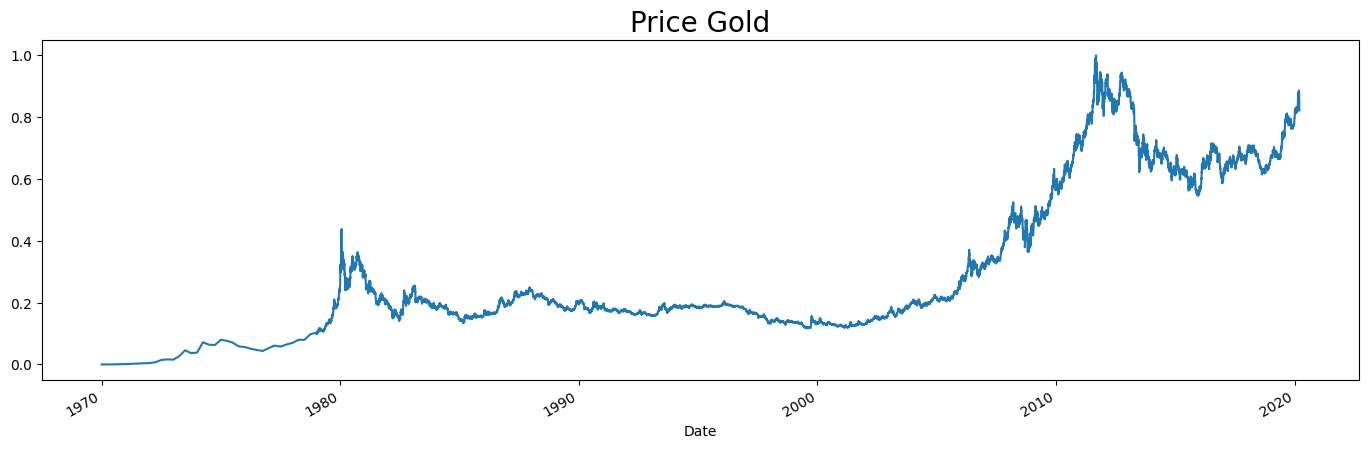

In [ ]:
plt.figure(figsize=(17,5))
datosT.Value.plot()
plt.title("Price Gold",fontsize=20)
plt.show()

In [ ]:
datosT.duplicated().any()

True

In [ ]:
# Verificar si hay fechas duplicadas en el índice
datosT.index.duplicated().any()

False

In [ ]:
datosT.isna().sum()

,0
Value,0


In [ ]:
datosT = datosT.interpolate(method='linear')
datosT.head()

,Value
Date,
1970-01-01,0.000054
1970-04-01,0.000000
1970-07-01,0.000161
1970-10-01,0.000591
1971-01-01,0.001237


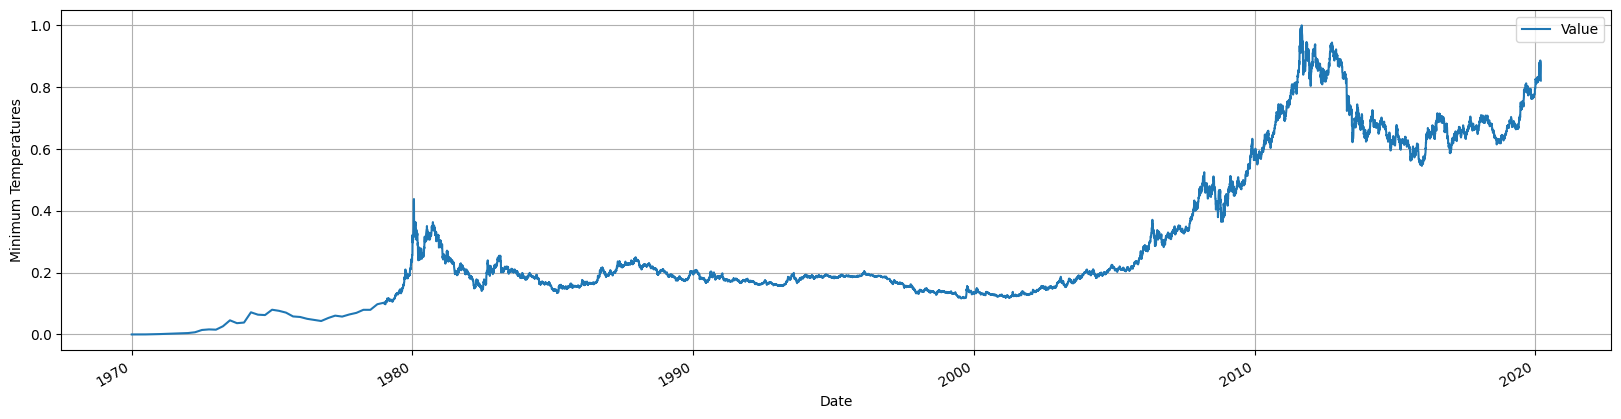

In [ ]:
ax = datosT.plot(figsize=(20,5), ylabel='Minimum Temperatures', xlabel="Date")
ax.grid();

In [ ]:
print(datosT.columns)


Index(['Value'], dtype='object')


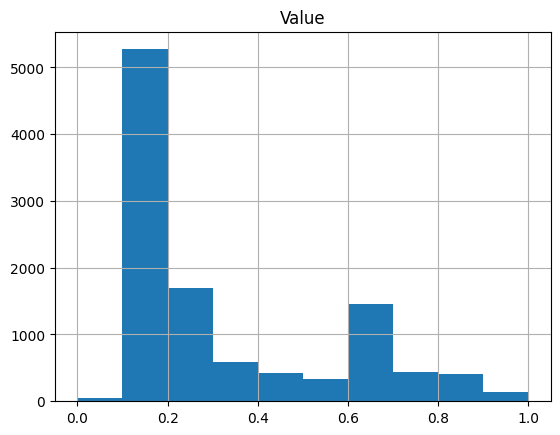

In [ ]:
datosT.hist();

<li> <b> 1.2.</b> Entrene por lo menos tres modelos basados en redes neuronales profundas.
<br>

<H1> MODELO DE CAPAS DENSAS </h1>

In [ ]:
fin_train = '2010-1-1'
inicio_prueba = '2010-10-03'
datosT_train, datosT_test = datosT.loc[: fin_train], datosT.loc[inicio_prueba:]
train_size, test_size = datosT_train.shape[0], datosT_test.shape[0]
print(f"Fechas train      : {datosT_train.index.min()} --- {datosT_train.index.max()}")
print(f"Fechas test       : {datosT_test.index.min()} --- {datosT_test.index.max()}")

Fechas train      : 1970-01-01 00:00:00 --- 2010-01-01 00:00:00
Fechas test       : 2010-10-04 00:00:00 --- 2020-03-13 00:00:00


In [ ]:
window = 6
horizon = 1

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    df = pd.DataFrame(data)
    n_vars = df.shape[1] if hasattr(df, 'shape') else 1
    cols = [df.shift(i) for i in range(n_in, 0, -1)] + [df.shift(-i) for i in range(n_out)]
    names = [f'var{j+1}(t{"+" if i > 0 else ""}{i})' for i in range(-n_in, n_out) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names[:agg.shape[1]]
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
train, test = series_to_supervised(datosT_train, window, horizon), series_to_supervised(datosT_test, window, horizon)
print(train.shape, test.shape)
X_train, X_test = train.values[:, 0:window], test.values[:, 0:window]
y_train, y_test = train.values[:, window:], test.values[:, window:]
print("--------\nEntrenamiento:",X_train.shape, y_train.shape,"\nPrueba:", X_test.shape, y_test.shape)

(8121, 7) (2459, 7)
--------
Entrenamiento: (8121, 6) (8121, 1) 
Prueba: (2459, 6) (2459, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

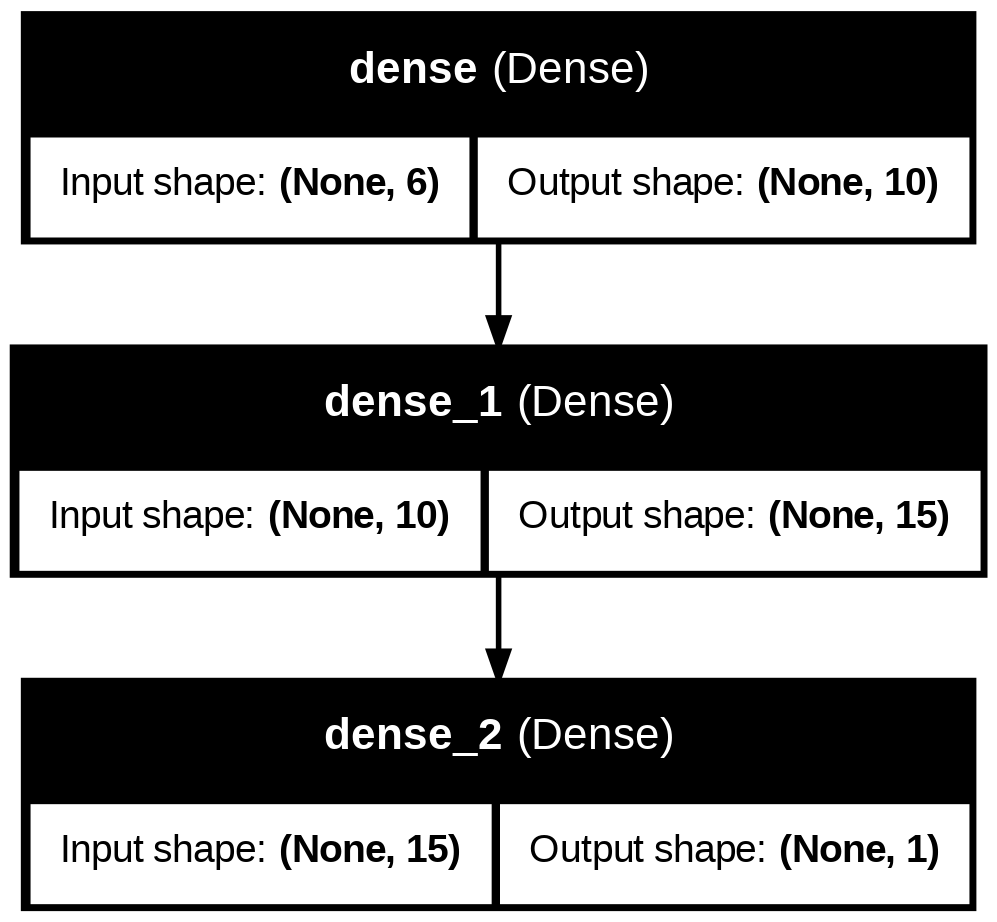

In [ ]:
# Se crea el modelo secuencial en Keras con capas densas
modelo = keras.models.Sequential()
modelo.add(keras.layers.Dense(10,input_shape=(X_train.shape[1],),activation='relu'))
modelo.add(keras.layers.Dense(15,activation='relu'))
modelo.add(keras.layers.Dense(horizon,activation='linear'))
# Se muestra el resumen de la arquitectura del modelo
modelo.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from random import seed
callbacks = [call.ModelCheckpoint(filepath='model.best.keras', verbose = 1, save_best_only=True),\
             call.EarlyStopping(patience=5, restore_best_weights=True),\
             call.ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose = 1, factor = 0.8, min_lr = 1e-5)]

modelo.compile('adamw','mse', metrics=['mse'])
historia = modelo.fit(X_train,y_train,
                      validation_split=0.2,
                      epochs=20,verbose=1,
                      callbacks=callbacks,shuffle=True,)

Epoch 1/20
187/203 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 - mse: 0.0105
Epoch 1: val_loss improved from inf to 0.01086, saving model to model.best.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0109 - val_mse: 0.0109 - learning_rate: 0.0010
Epoch 2/20
196/203 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8757e-04 - mse: 4.8757e-04
Epoch 2: val_loss improved from 0.01086 to 0.00504, saving model to model.best.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.8428e-04 - mse: 4.8428e-04 - val_loss: 0.0050 - val_mse: 0.0050 - learning_rate: 0.0010
Epoch 3/20
197/203 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9214e-04 - mse: 1.9214e-04
Epoch 3: val_loss improved from 0.00504 to 0.00018, saving model to model.best.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.8954e-04 - mse: 1.8954e-04 - val_loss: 1.7608e-04 - val_mse: 1.7608e-04 - learning_rate: 0.0010
Epoch 4/20
191/203 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0963e-05 -

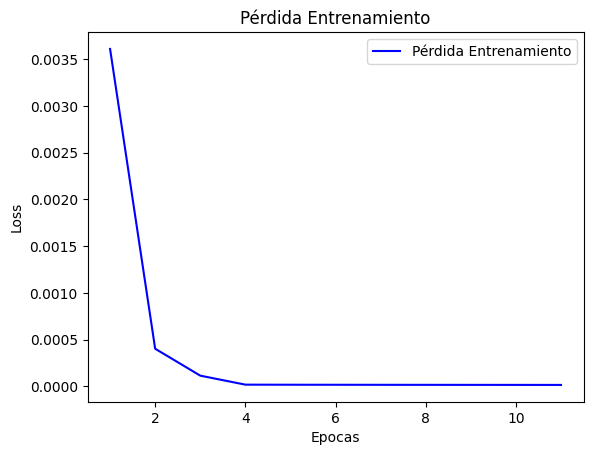

In [ ]:
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)
plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = mod.load_model('model.best.keras')
predictions = model.predict(X_test)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
import numpy as np

# Definir la función para calcular RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Supongamos que ya tienes tus datos de entrenamiento y prueba
# y_train, y_test, predictions

# Definir y entrenar el scaler
scaler = StandardScaler()
scaler.fit(y_train.reshape(-1, 1))

# Imprimir las métricas de evaluación
print("RMSE:", root_mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), scaler.inverse_transform(predictions.reshape(-1, 1))))
print("MAE:", mean_absolute_error(scaler.inverse_transform(y_test.reshape(-1, 1)), scaler.inverse_transform(predictions.reshape(-1, 1))))
print("MAPE:", mean_absolute_percentage_error(scaler.inverse_transform(y_test.reshape(-1, 1)), scaler.inverse_transform(predictions.reshape(-1, 1))) * 100)
print("R2:", r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), scaler.inverse_transform(predictions.reshape(-1, 1))))


RMSE: 0.0016838387324859495
MAE: 0.0014788974671845186
MAPE: 0.5350849387755434
R2: 0.9622310363140146


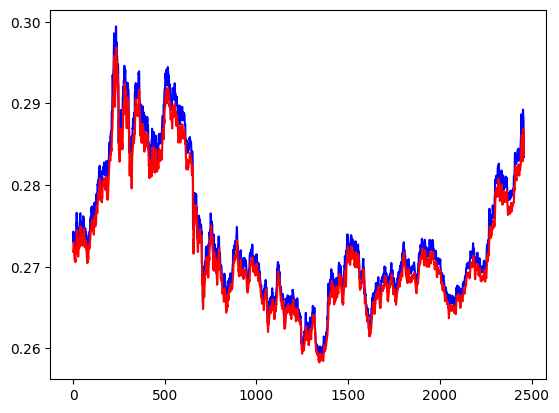

In [ ]:
plt.plot(scaler.inverse_transform(y_test),'b',scaler.inverse_transform(predictions),'r');

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 6, 6)                │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 2, 6)                │             186 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2, 6)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307 (1.20 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

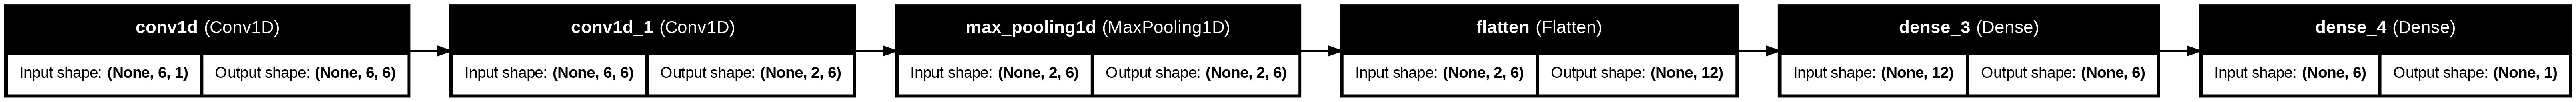

In [ ]:
keras.utils.set_random_seed(42)
modelo = keras.models.Sequential()
modelo.add(keras.layers.Conv1D(6, 5, activation="relu",padding="same", input_shape=(window,1)))
modelo.add(keras.layers.Conv1D(6, 5, activation="relu"))
modelo.add(keras.layers.MaxPooling1D(pool_size=3,strides=1, padding='same'))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(6, activation = 'relu'))
modelo.add(keras.layers.Dense(horizon, activation = 'linear'))
# Se muestra el resumen de la arquitectura del modelo
modelo.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo, to_file='model_plot.png', show_shapes=True, show_layer_names=True,rankdir='LR')

In [ ]:
callbacks = [call.ModelCheckpoint(filepath='model.best.keras', verbose = 1, save_best_only=True),\
             call.EarlyStopping(patience=10, restore_best_weights=True),\
             call.ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose = 1, factor = 0.8, min_lr = 1e-5)]

modelo.compile('adam','huber', metrics=['mse'])
historia = modelo.fit(X_train,y_train,
                      validation_split=0.2,
                      epochs=250,verbose=1,
                      callbacks=callbacks,shuffle=True)

Epoch 1/250
189/203 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - mse: 0.0040
Epoch 1: val_loss improved from inf to 0.00114, saving model to model.best.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0019 - mse: 0.0038 - val_loss: 0.0011 - val_mse: 0.0023 - learning_rate: 0.0010
Epoch 2/250
187/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7933e-05 - mse: 9.5866e-05
Epoch 2: val_loss improved from 0.00114 to 0.00011, saving model to model.best.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6474e-05 - mse: 9.2948e-05 - val_loss: 1.0688e-04 - val_mse: 2.1375e-04 - learning_rate: 0.0010
Epoch 3/250
190/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3217e-05 - mse: 2.6435e-05
Epoch 3: val_loss improved from 0.00011 to 0.00004, saving model to model.best.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3085e-05 - mse: 2.6170e-05 - val_loss: 4.4877e-05 - val_mse: 8.9754e-05 - learning_rate: 0.0010
Epoch 4/250
188/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1

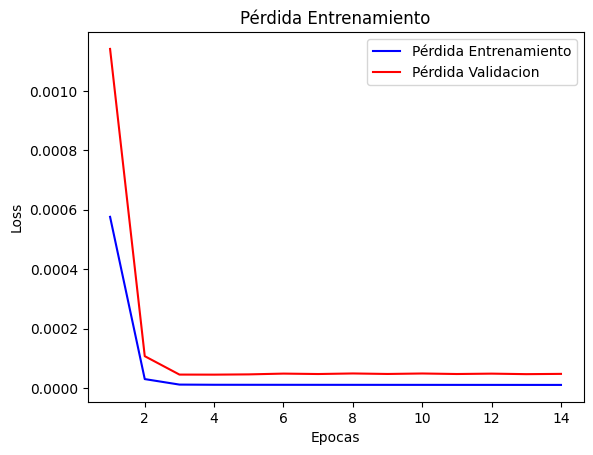

In [ ]:
perdida_train = historia.history['loss']
perdida_test = historia.history['val_loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.plot(epocas, perdida_test, 'r', label='Pérdida Validacion')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = mod.load_model('model.best.keras')
predictions = model.predict(X_test)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


En este caso, estamos imprimiendo las metricas de rendimiento del modelo

In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
import numpy as np

# Definir la función para calcular RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Supongamos que ya tienes tus datos de entrenamiento y prueba
# y_train, y_test, predictions

# Definir y entrenar el scaler
scaler_keras = StandardScaler()
scaler_keras.fit(y_train.reshape(-1, 1))

# Imprimir las métricas de evaluación
print("RMSE:", root_mean_squared_error(scaler_keras.inverse_transform(y_test.reshape(-1, 1)), scaler_keras.inverse_transform(predictions.reshape(-1, 1))))
print("MAE:", mean_absolute_error(scaler_keras.inverse_transform(y_test.reshape(-1, 1)), scaler_keras.inverse_transform(predictions.reshape(-1, 1))))
print("MAPE:", mean_absolute_percentage_error(scaler_keras.inverse_transform(y_test.reshape(-1, 1)), scaler_keras.inverse_transform(predictions.reshape(-1, 1))) * 100)
print("R2:", r2_score(scaler_keras.inverse_transform(y_test.reshape(-1, 1)), scaler_keras.inverse_transform(predictions.reshape(-1, 1))))


RMSE: 0.0017886786661564635
MAE: 0.001550651147918483
MAPE: 0.5620070312562674
R2: 0.9573814438259289


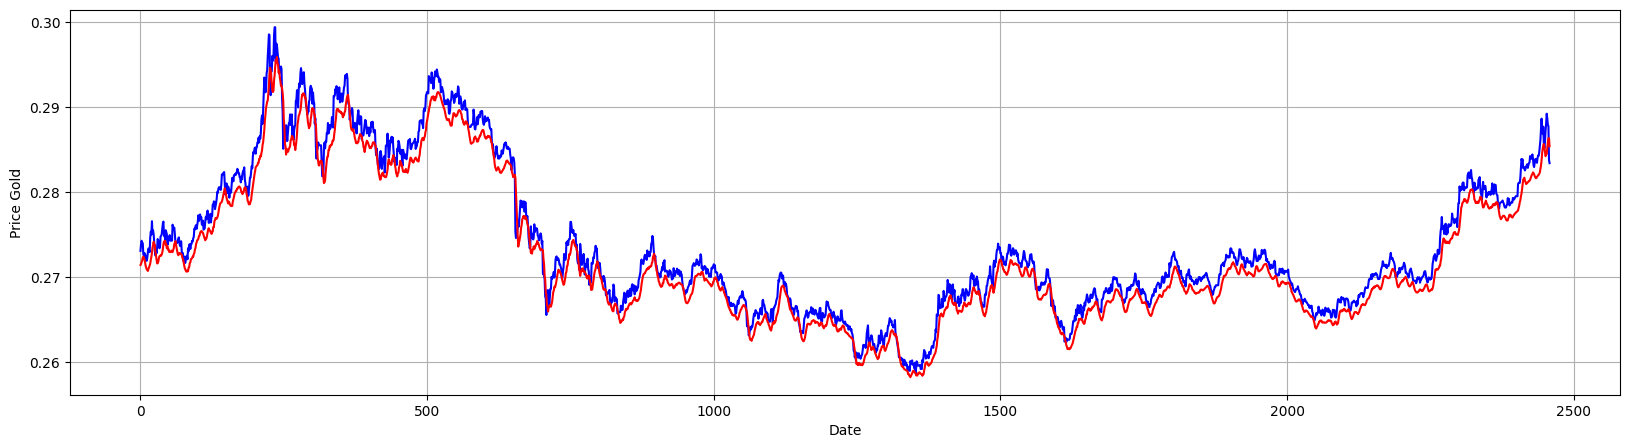

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(scaler_keras.inverse_transform(y_test),'b',scaler_keras.inverse_transform(predictions),'r')
plt.grid('on')
plt.ylabel('Price Gold')
plt.xlabel("Date");

<H1> Redes Recurrentes (LSTM)

Importamos las librerias necesarias para el dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

Cargamos nuevamente los valores del dataset para verificar

In [ ]:
# Cargar los datos
data = os.path.join(path, "gold_price_data.csv")
data = pd.read_csv(csv_file)

In [ ]:
data.head

<bound method NDFrame.head of              Date    Value
0      1970-01-01    35.20
1      1970-04-01    35.10
2      1970-07-01    35.40
3      1970-10-01    36.20
4      1971-01-01    37.40
...           ...      ...
10782  2020-03-09  1672.50
10783  2020-03-10  1655.70
10784  2020-03-11  1653.75
10785  2020-03-12  1570.70
10786  2020-03-13  1562.80

[10787 rows x 2 columns]>

In [ ]:
print(data.head())  # Muestra las primeras filas del DataFrame
print(data.columns)  # Muestra las columnas para asegurarte de que "Value" está presente

         Date  Value
0  1970-01-01   35.2
1  1970-04-01   35.1
2  1970-07-01   35.4
3  1970-10-01   36.2
4  1971-01-01   37.4
Index(['Date', 'Value'], dtype='object')


In [ ]:
# Normalizar los datos (escala de 0 a 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Value']])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0109 - val_loss: 9.9458e-05
Epoch 2/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4891e-05 - val_loss: 6.4322e-05
Epoch 3/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3025e-05 - val_loss: 6.3019e-05
Epoch 4/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3271e-05 - val_loss: 6.3083e-05
Epoch 5/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3508e-05 - val_loss: 6.4021e-05
Epoch 6/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3695e-05 - val_loss: 6.4970e-05
Epoch 7/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3793e-05 - val_loss: 6.5275e-05
Epoch 8/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3765e-05 - val_loss: 6.5000e-05
Epoch 9/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3680e-05 - val_loss: 6.4125e-05
Epoch 10/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3554e-05 - val_loss: 6.2761e-05
Epoch 11/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3376e-05 - 

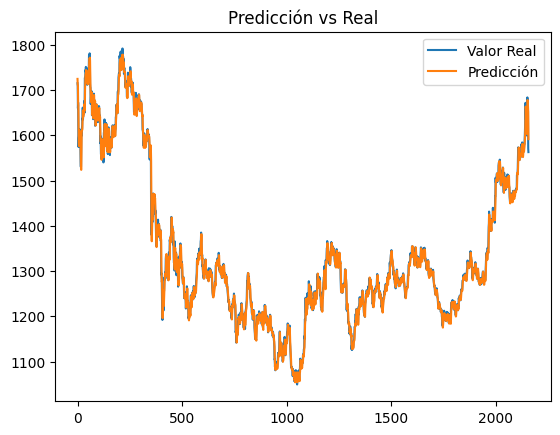

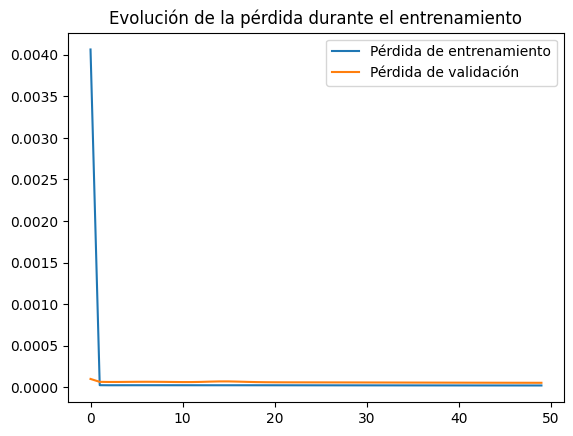

In [ ]:
# Crear secuencias para entrenamiento
def create_sequences(data, time_steps=4):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Crear secuencias con los datos escalados
time_steps = 4
X, y = create_sequences(data_scaled, time_steps)

# Reshape de X para que sea compatible con Conv1D (muestras, pasos de tiempo, características)
X = X.reshape((X.shape[0], X.shape[1], 1))
y = y.reshape((y.shape[0], 1))

# Dividir los datos en entrenamiento y prueba
split = int(len(X) * 0.8)  # 80% para entrenamiento
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Crear el modelo Conv1D
model = Sequential()

# Capa Conv1D
model.add(Conv1D(filters=6, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Capa Flatten
model.add(Flatten())

# Capa densa
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')

# Predicciones del modelo
y_pred = model.predict(X_test)

# Desescalar las predicciones y etiquetas verdaderas
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Calcular las métricas de rendimiento
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Graficar las predicciones frente a las reales
plt.plot(y_test_rescaled, label='Valor Real')
plt.plot(y_pred_rescaled, label='Predicción')
plt.legend()
plt.title('Predicción vs Real')
plt.show()

# Graficar la evolución de la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()


<hr>
<h1> Modelo con RNN </h1>

Importamos las librerias necesarias para realizar el modelo RRN de la siguiente manera

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

Esta función `create_sequences` toma datos y un número de pasos de tiempo (`time_steps`), y genera secuencias de longitud `time_steps` para las características (`X`) y los valores objetivo (`y`), devolviéndolos como arreglos de NumPy.

In [ ]:
# Crear secuencias para entrenamiento
def create_sequences(data, time_steps=4):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

Cargamos nuevamente nuestro dataset para evitar obtener valores residuales que puedan afectar el rendimiento de nuestro modelo.

In [ ]:
# Ruta completa al archivo CSV
csv_file = os.path.join(path, "gold_price_data.csv")
datosT = pd.read_csv(csv_file)

Como nuestra serie temporal tiene una columna con el tipo de Date, es de suma importancia convertir este valor en tipo date, de la siguiente manera

In [ ]:
# Convertimos la columna 'Date' a formato datetime
datosT['Date'] = pd.to_datetime(datosT['Date'], format='%Y-%m-%d')
datosT.set_index('Date', inplace=True, drop=True)

Claro, como estamos trabajando con valores numericos en la columna value, es de suma importancia realizar un normalizado de los datos, para mejorar el rendimiento del modelo al momento de realizar el correspondiente entrenamiento.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
datosT['Value'] = scaler.fit_transform(datosT[['Value']])

Nuevamente, tomamos los rangos de fechas para el conjunto de datos de entrenamiento y prueba, de la siguiente manera hemos clasificado las fechas

In [ ]:
# Definir las fechas de entrenamiento y prueba
fin_train = '2010-01-01'
inicio_prueba = '2010-10-03'
datosT_train, datosT_test = datosT.loc[:fin_train], datosT.loc[inicio_prueba:]
train_size, test_size = datosT_train.shape[0], datosT_test.shape[0]
print(f"Fechas train      : {datosT_train.index.min()} --- {datosT_train.index.max()}")
print(f"Fechas test       : {datosT_test.index.min()} --- {datosT_test.index.max()}")

Fechas train      : 1970-01-01 00:00:00 --- 2010-01-01 00:00:00
Fechas test       : 2010-10-04 00:00:00 --- 2020-03-13 00:00:00


Seguidamente hacemos una secuencia con los datos escalados anteriormente de la siguiente manera

In [ ]:
# Crear secuencias con los datos escalados
time_steps = 4
X_train, y_train = create_sequences(datosT_train.values, time_steps)
X_test, y_test = create_sequences(datosT_test.values, time_steps)

Claro, ahora tendremos que realizar un ajuste a la forma con la que nuestro modelo de RNN va a recibir los datos, para ello en el siguiente bloque lo realizamos

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

Seguidamente creamos el modelo RRN

In [ ]:
# Crear el modelo RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Realizamos el entrenamiento del modelo

In [ ]:
history = model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/6
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0051 - val_loss: 4.3494e-04
Epoch 2/6
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.0973e-05 - val_loss: 3.3772e-04
Epoch 3/6
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.0346e-05 - val_loss: 2.8644e-04
Epoch 4/6
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0035e-05 - val_loss: 2.6388e-04
Epoch 5/6
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9619e-05 - val_loss: 3.0272e-04
Epoch 6/6
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9165e-05 - val_loss: 2.6698e-04


Evaluamos el modelo

In [ ]:
# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')
# Predicciones del modelo
y_pred = model.predict(X_test)

# Desescalar las predicciones y etiquetas verdaderas
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2148e-04
Pérdida en el conjunto de prueba: 0.0002669798268470913
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


Se sacan las metricas de rendimiento del modelo

In [ ]:
# Calcular las métricas de rendimiento
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 21.76188091850048
MSE: 923.5460798570294
RMSE: 30.389900951747595


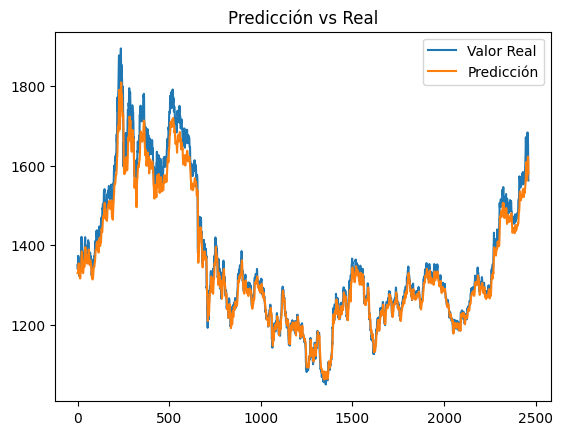

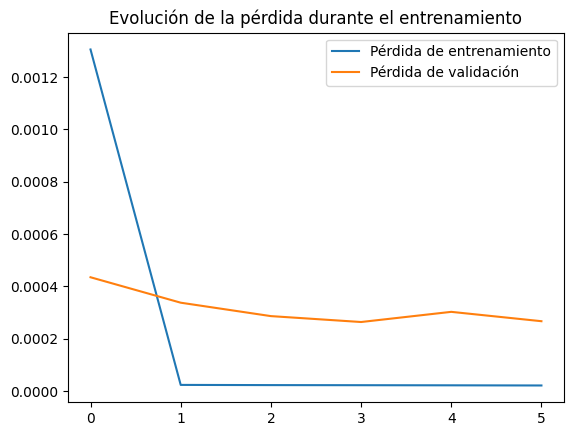

In [ ]:
# Graficar las predicciones frente a las reales
plt.plot(y_test_rescaled, label='Valor Real')
plt.plot(y_pred_rescaled, label='Predicción')
plt.legend()
plt.title('Predicción vs Real')
plt.show()

# Graficar la evolución de la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()


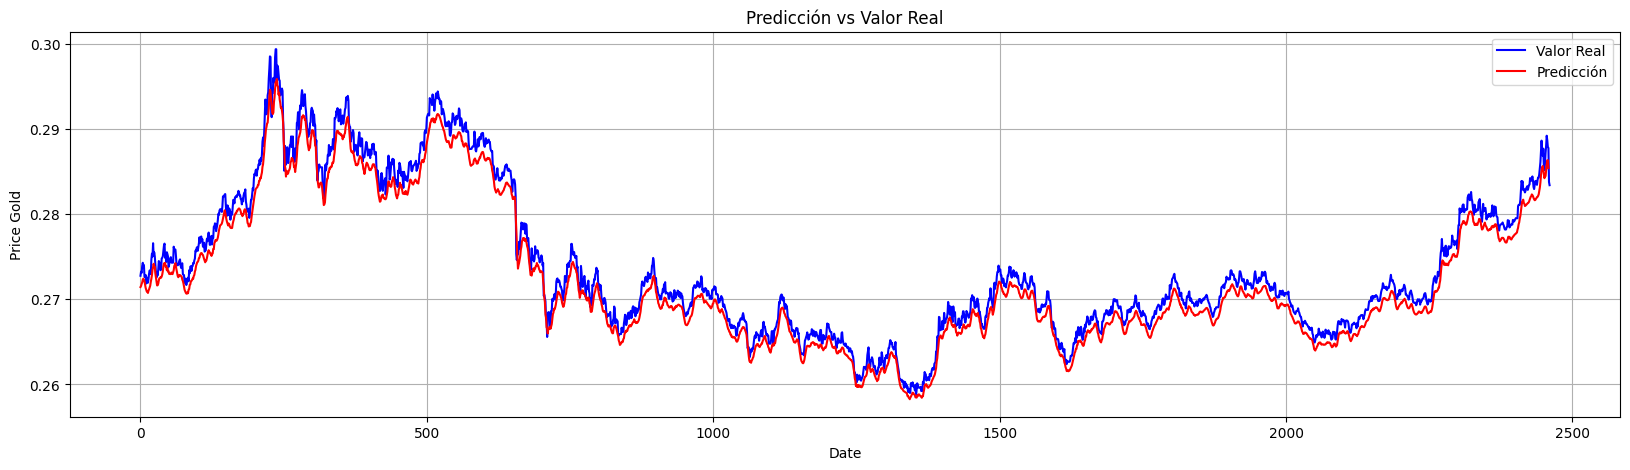

In [ ]:
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(20, 5))

# Graficar los valores reales y las predicciones
plt.plot(scaler_keras.inverse_transform(y_test), 'b', label='Valor Real')
plt.plot(scaler_keras.inverse_transform(predictions), 'r', label='Predicción')

# Añadir cuadrícula
plt.grid('on')

# Añadir etiquetas y título
plt.ylabel('Price Gold')
plt.xlabel('Date')
plt.legend()
plt.title('Predicción vs Valor Real')

# Mostrar la gráfica
plt.show()


<h1>Referencias, fuentes de inspiración<h1/>
<h3>Dataset seleccionado:
"Price Gold" de Kaggle, una serie temporal que contiene datos históricos del precio del oro.<h3/>
<h3>Códigos y herramientas utilizados:
Ejemplos oficiales de TensorFlow-Keras para DNN, CNN 1D y RNN en series temporales.<h3/>


<h3>Aprende Machine Learning. (n.d.). Pronóstico de series temporales con redes neuronales en Python. Aprende Machine Learning. Recuperado de https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/?utm_source<h3/>

<h3>TensorFlow. (n.d.). Time series forecasting. TensorFlow. Recuperado de https://www.tensorflow.org/tutorials/structured_data/time_series?utm_source<h3/>

<h3>Ciencia de Datos. (n.d.). Deep Learning para la Predicción de Series Temporales: Redes Neuronales Recurrentes. Ciencia de Datos. Recuperado de https://cienciadedatos.net/documentos/py54-forecasting-con-deep-learning?utm_source<h3/>

<h3> Descripciones<h3/>
diagramas


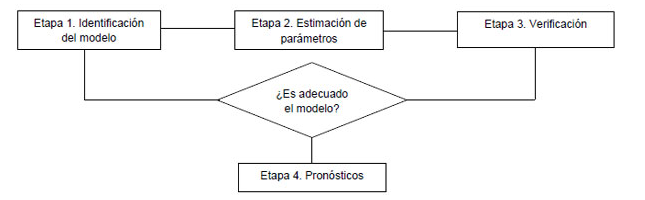


<h3> Arquitectura basica de modelo de redes nueronales<h3/>

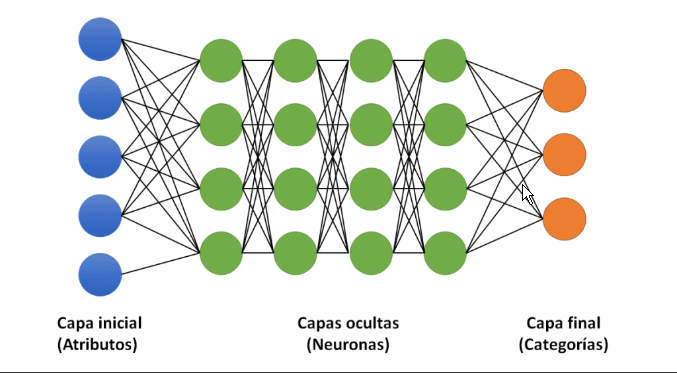



<h3>Arquitectura basica modelo MLP<h3/>

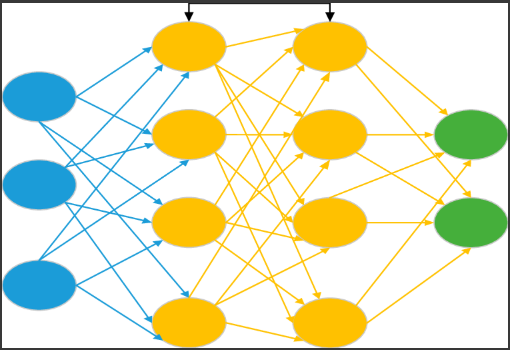



<h3> Hadware Utilizado<h3/>
4.2 HARDWARE UTILIZADO
Para la realizaciòn de este proyecto fue necesario utilziar un ordenador y el bakcend de Python de google Colab, a continuacion damos mas detalle.


Ordenador Portatil
Se utilizo un computador portatil de los intengrantes de grupo con las siguientes caracteristicas.

RTX GFORCE 4050 6GB

INTEL I5 12000H

16 GB RAM

Backend Google Colab Python
24 GRAM

16 VRAM DEDICADA

80 GB DISCO ALMACENAMIENTO

<h1>Recopilación de datos<h1/>

<h3>Dataset seleccionado: "Price Gold" de Kaggle, una serie temporal que contiene datos históricos del precio del oro.<h3/>

<h1> Problemas u obstáculos que se presentaron. </h1>

<h3> Tuvimos problemas en encontrar el dataset, normalizar, graficar los datos, que los datos no presentaban secuencias de fechas y en el procesamiento. </h3>

<h1> Conclusiones<h1/>

<h3>- Se logro una precisión alta en las predicciones: La línea roja (predicciones) sigue muy de cerca la línea azul (valores reales), lo que indica que el modelo es capaz de capturar con precisión las tendencias y patrones generales de la serie temporal.<h3/>

<h3>- Se iene uen desempeño en distintas fases: El modelo mantiene su precisión tanto en periodos de crecimiento como en periodos de descenso, mostrando que puede manejar cambios en la tendencia del precio del oro.<h3/>

<h3>- Concluimos que el modelo demuestra una buena capacidad para generalizar al predecir valores que no están exactamente en los datos de entrenamiento, lo que es evidente por el alineamiento consistente entre las predicciones y los valores reales en toda la serie temporal. Esto significa que el modelo está bien entrenado y no está sobreajustado.<h3/>